In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from pprint import pprint
import openweathermapy.core as owm
from citipy import citipy
import random as random

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'6f4ceb243793f6a90aeed94e4f17b8a4'

## Generate Cities list

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #size 1500
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500) #size 1500
#zip in to a list of tuples
lat_lngs = zip(lats, lngs)
city_lat=[]
#to print zipped object
#for i in lat_lngs:
#    print(i)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_lng[0])

# Print the city count to confirm sufficient count
print(f"length of cities is {len(cities)}")
print(f"length of city_lat is {len(city_lat)}")



length of cities is 625
length of city_lat is 625


In [3]:
MYDEBUG = True

## Perform API Calls

In [4]:
#save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #use imperial to get farenheit

#build partial string query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#initialize lists to hold temperature, humidity clouds, wind, valid cities, invalid cities and valid latitudes
temp = []
humidity= []
clouds = []
wind = []
city_not_found=[]
valid_cities=[]
valid_lat=[]

with open("text.txt","w")as text:
    for i in range(len(cities)):
        response = requests.get(query_url+cities[i]).json()
    
        if response["cod"] == "404":
            print(f"city number {i}, {cities[i]} is not found", file=text)
            print(f"city number {i}, {cities[i]} is not found")
            city_not_found.append(cities[i])
        else:
            print(f"Getting data for city number {i}, {cities[i]}", file=text)
            print(f"Getting data for city number {i}, {cities[i]}")
            valid_cities.append(cities[i])
            valid_lat.append(city_lat[i])
            temp.append(response["main"]["temp"])
            humidity.append(response["main"]["humidity"])
            clouds.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"]) 
        if MYDEBUG:
            break
text.close()
#print(f"cities list {valid_cities}, len {len(valid_cities)}")  
#print(f"temp list {temp}, len {len(temp)}")
#print(f"humidity list {humidity}, len {len(humidity)}")
#print(f"clouds list {clouds}, len {len(clouds)}")
#print(f"wind list {wind}, len {len(wind)}")
#print(f"valid city lat{valid_lat}, len {len(valid_lat)}")

Getting data for city number 0, cervo


## Create master table

In [5]:
#create dictionary of cities, temp, humidity, clouds, and wind
d = {"Cities": valid_cities, "Temperature": temp, "Humidity": humidity, "Cloudiness": clouds, "Wind Speed": wind, "Latitude":valid_lat}

#convert dictionary to dataframe
df = pd.DataFrame(d)

#save csv of all valid data retrieved
df.to_csv("data_retrieved.csv")
df.head()

,Cities,Temperature,Humidity,Cloudiness,Wind Speed,Latitude
0,cervo,65.71,95,100,1.79,46.212968


## Plot tables

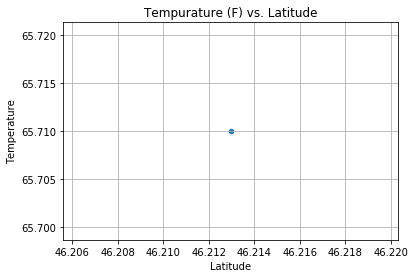

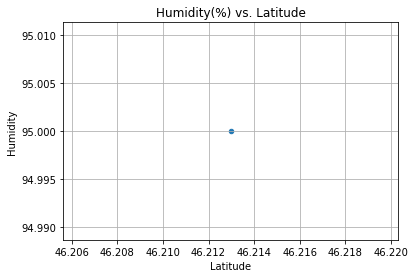

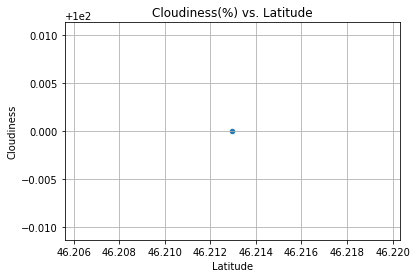

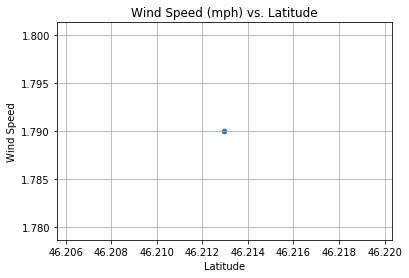

In [6]:
#plot latitude and temperature
df.plot(kind="scatter", x="Latitude", y="Temperature")
plt.title("Tempurature (F) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/temp_latitude.png")
plt.show()

#plot latitude and humidity
df.plot(kind="scatter", x="Latitude", y="Humidity")
plt.title("Humidity(%) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/humidity_latitude.png")
plt.show()

#plot Cloudiness and humidity
df.plot(kind="scatter", x="Latitude", y="Cloudiness")
plt.title("Cloudiness(%) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/cloudiness_latitude.png")
plt.show()

#plot Cloudiness and humidity
df.plot(kind="scatter", x="Latitude", y="Wind Speed")
plt.title("Wind Speed (mph) vs. Latitude")
plt.grid(alpha=1)
plt.savefig("Images/wind_latitude.png")
plt.show()

In [7]:
#Get sample response for reference

response=requests.get("http://api.openweathermap.org/data/2.5/weather?appid=6f4ceb243793f6a90aeed94e4f17b8a4&units=imperial&q=paris").json()
pprint(response)


{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 48.86, 'lon': 2.35},
 'dt': 1578460500,
 'id': 2988507,
 'main': {'feels_like': 45.66,
          'humidity': 87,
          'pressure': 1026,
          'temp': 52.38,
          'temp_max': 53.6,
          'temp_min': 51.01},
 'name': 'Paris',
 'sys': {'country': 'FR',
         'id': 6540,
         'sunrise': 1578469365,
         'sunset': 1578499853,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 11.41}}
